# Understanding Classification and Logistic Regression with Python

## Introduction

This notebook contains a short introduction to the basic principles of classification and logistic regression. A simple Python simulation is used to illustrate these principles. Specifically, the following steps are performed:

- A data set is created. The label has binary `TRUE` and `FALSE` labels. Values for two features are generated from two bivariate Normal distribion, one for each label class.
- A plot is made of the data set, using color and shape to show the two label classes. 
- A plot of a logistic function is computed. 
- For each of three data sets a logistic regression model is computed, scored and a plot created using color to show class and shape to show correct and incorrect scoring.

## Create the data set

The code in the cell below computes the two class data set. The feature values for each label level are computed from a bivariate Normal distribution. Run this code and  examine the first few rows of the data frame.

In [1]:
def sim_log_data(x1, y1, n1, sd1, x2, y2, n2, sd2):
    import pandas as pd
    import numpy.random as nr
    
    wx1 = nr.normal(loc = x1, scale = sd1, size = n1)
    wy1 = nr.normal(loc = y1, scale = sd1, size = n1)
    z1 = [1]*n1
    wx2 = nr.normal(loc = x2, scale = sd2, size = n2)
    wy2 = nr.normal(loc = y2, scale = sd2, size = n2)
    z2 = [0]*n2
    
    df1 = pd.DataFrame({'x': wx1, 'y': wy1, 'z': z1})
    df2 = pd.DataFrame({'x': wx2, 'y': wy2, 'z': z2}) 
    return pd.concat([df1, df2], axis = 0, ignore_index = True)   
sim_data = sim_log_data(1, 1, 50, 1, -1, -1, 50, 1)
sim_data.head()

,x,y,z
0,0.531840,1.024287,1
1,0.776117,-1.334691,1
2,2.350999,1.215076,1
3,0.893795,0.585036,1
4,1.246227,0.653546,1


## Plot the data set

The code in the cell below plots the data set using color to show the two classes of the labels. Execute this code and examine the results. Notice that the posion of the points from each class overlap with each other. 

'Done'

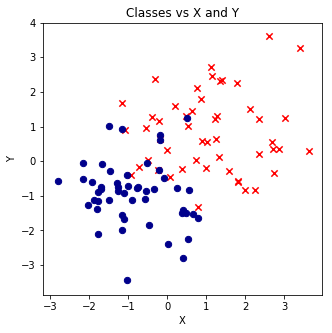

In [2]:
%matplotlib inline
def plot_class(df):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(5, 5))
    fig.clf()
    ax = fig.gca()
    df[df.z == 1].plot(kind = 'scatter', x = 'x', y = 'y', ax = ax, 
                       alpha = 1.0, color = 'Red', marker = 'x', s = 40) 
    df[df.z == 0].plot(kind = 'scatter', x = 'x', y = 'y', ax = ax, 
                       alpha = 1.0, color = 'DarkBlue', marker = 'o', s = 40) 
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Classes vs X and Y')
    return 'Done'
plot_class(sim_data)

## Plot the logistic function

Logistic regression computes a binary {0,1} score using a logistic function. A value of the logistic function above the cutoff (typically 0.5) are scored as a 1 or true, and values less than the cutoff are scored as a 0 or false. Execute the code and examine the resulting logistic function.

'done'

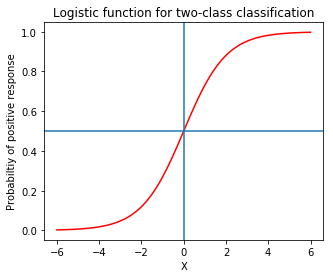

In [6]:
def plot_logistic(upper = 6, lower = -6, steps = 100):
    import matplotlib.pyplot as plt
    import pandas as pd
    import math as m
    step = float(upper - lower)  / float(steps)
    x = [lower + x * step for x in range(101)]
    y = [m.exp(z)/(1 + m.exp(z)) for z in x]
    
    fig = plt.figure(figsize=(5, 4))
    fig.clf()
    ax = fig.gca()
    ax.plot(x, y, color = 'r')
    ax.axvline(0, 0.0, 1.0)
    ax.axhline(0.5, lower, upper)
    ax.set_xlabel('X')
    ax.set_ylabel('Probabiltiy of positive response')
    ax.set_title('Logistic function for two-class classification')
    return 'done'

plot_logistic()

## Compute and score a logistic regression model

There is a considerable anount of code in the cell below. 

The first function uses scikit-learn to compute and scores a logsitic regression model. Notie that the features and the label must be converted to a numpy array which is required for scikit-learn. 

The second function computes the evaluation of the logistic regression model in the following steps:
- Compute the elements of theh confusion matrix.
- Plot the correctly and incorrectly scored cases, using shape and color to identify class and classification correctness.
- Commonly used performance statistics are computed.

Execute this code and examine the results. Notice that most of the cases have been correctly classified. Classification errors appear along a boundary between those two classes. 

         Negative  Positive
TrueNeg        47         3
TruePos         7        43
accracy = 0.9
precision = 0.934782608696
recall = 0.86


'Done'

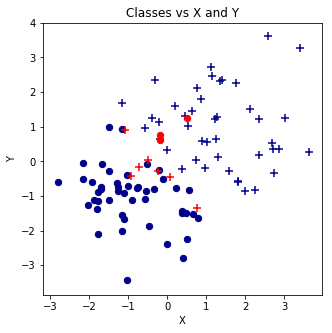

In [7]:
def logistic_mod(df, logProb = 1.0):
    from sklearn import linear_model

    ## Prepare data for model
    nrow = df.shape[0]
    X = df[['x', 'y']].as_matrix().reshape(nrow,2)
    Y = df.z.as_matrix().ravel() #reshape(nrow,1)
    ## Compute the logistic regression model
    lg = linear_model.LogisticRegression()
    logr = lg.fit(X, Y)
    ## Compute the y values
    temp = logr.predict_log_proba(X)  
    df['predicted']  = [1 if (logProb > p[1]/p[0]) else 0 for p in temp]
    return df

def eval_logistic(df):
    import matplotlib.pyplot as plt
    import pandas as pd

    truePos = df[((df['predicted'] == 1) & (df['z'] == df['predicted']))]  
    falsePos = df[((df['predicted'] == 1) & (df['z'] != df['predicted']))] 
    trueNeg = df[((df['predicted'] == 0) & (df['z'] == df['predicted']))]  
    falseNeg = df[((df['predicted'] == 0) & (df['z'] != df['predicted']))]

    fig = plt.figure(figsize=(5, 5))
    fig.clf()
    ax = fig.gca()
    truePos.plot(kind = 'scatter', x = 'x', y = 'y', ax = ax, 
                       alpha = 1.0, color = 'DarkBlue', marker = '+', s = 80) 
    falsePos.plot(kind = 'scatter', x = 'x', y = 'y', ax = ax, 
                       alpha = 1.0, color = 'Red', marker = 'o', s = 40)  
    trueNeg.plot(kind = 'scatter', x = 'x', y = 'y', ax = ax, 
                       alpha = 1.0, color = 'DarkBlue', marker = 'o', s = 40)  
    falseNeg.plot(kind = 'scatter', x = 'x', y = 'y', ax = ax, 
                       alpha = 1.0, color = 'Red', marker = '+', s = 80) 
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Classes vs X and Y')
    
    TP = truePos.shape[0]
    FP = falsePos.shape[0]
    TN = trueNeg.shape[0]
    FN = falseNeg.shape[0]
       
    confusion = pd.DataFrame({'Positive': [FP, TP],
                              'Negative': [TN, FN]},
                               index = ['TrueNeg', 'TruePos'])
    accuracy = float(TP + TN)/float(TP + TN + FP + FN)      
    precision = float(TP)/float(TP + FP)     
    recall =  float(TP)/float(TP + FN)      
    
    print(confusion)
    print('accracy = ' + str(accuracy))
    print('precision = ' + str(precision))
    print('recall = ' + str(recall))
    
    return 'Done' 

mod = logistic_mod(sim_data)
eval_logistic(mod)

## Moving the decision boundary

The example above uses a cutoff at the midpoint of the logistic function. However, you can change the trade-off between correctly classifying the positive cases and correctly classifing the negative cases. The code in the cell below computes and scores a logistic regressiion model for three different cutoff points. 

Run the code in the cell and carefully compare the results for the three cases. Notice, that as the logistic cutoff changes the decision boundary moves on the plot, with progressively more positive cases are correctly classified. In addition, accuracy and precision decrease and recall increases. 

         Negative  Positive
TrueNeg        34        16
TruePos        14        36
accracy = 0.7
precision = 0.692307692308
recall = 0.72
         Negative  Positive
TrueNeg        27        23
TruePos         5        45
accracy = 0.72
precision = 0.661764705882
recall = 0.9
         Negative  Positive
TrueNeg        21        29
TruePos         3        47
accracy = 0.68
precision = 0.618421052632
recall = 0.94


'Done'

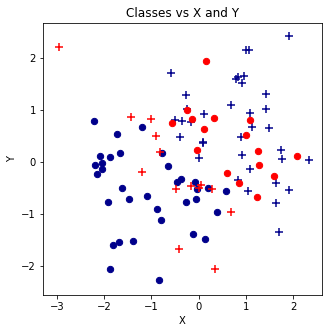

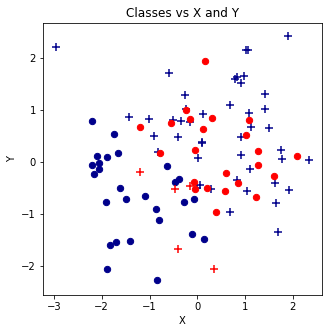

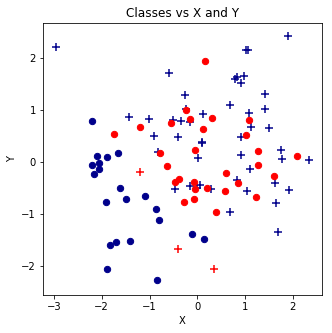

In [8]:
def logistic_demo_prob():
    logt = sim_log_data(0.5, 0.5, 50, 1, -0.5, -0.5, 50, 1)
    
    probs = [1, 2, 4]
    for p in probs:
        logMod = logistic_mod(logt, p)
        eval_logistic(logMod)
    return 'Done'
logistic_demo_prob()